In [139]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.draw import disk, circle_perimeter
import pandas as pd
import numpy as np

In [102]:
base_path = "/media/ula/DATADRIVE1/fos_gfp_tmaze/ctx_landmark/despeckle/"
res_dir_path = base_path + "alignment_result/"
dir_path = res_dir_path + "aligned_despeckle/"
cell_data_fn_template = "m{}r{}_{}_output.txt"
img_fn_template = "m{}r{}_{}.tif"

In [103]:
roi_diameter = [8,7,4]

In [104]:
landmark_first_mice = [1, 3, 4, 6,7,9,12,15,17, 18]
ctx_first_mice = [2,5,8,10,11,13,14,16,19,20]
ctx_first_mice = [10]
ctx_session_order = ["ctx", "landmark1", "landmark2"]

max_region_no = 4

In [184]:
def calculate_intensity(center_x, center_y, center_z, img):
    center_x = int(round(center_x))
    center_y = int(round(center_y))
    center_z = int(round(center_z))
    sum_int = 0
    area_int = 0
    for i in range(-2,3):
        if(center_z+i >= 0 and center_z+i < img.shape[0]):
            diameter = roi_diameter[abs(i)]
            rad = diameter//2
            disk_ = disk((center_y, center_x), rad, shape=img[0].shape)
            sum_int += np.sum(img[center_z+i][disk_])
            area_int += len(img[center_z+i][disk_])
    return sum_int/area_int

In [214]:
def compare_sessions(mouse, region, session_order):
    df_array={}
    img_array={}
    for i in range(len(session_order)):
        df_array[i] = pd.read_csv(dir_path + cell_data_fn_template
                                  .format(mouse, region, session_order[i]), "\t", header=1)
        img_array[i] =  io.imread(dir_path + img_fn_template
                                  .format(mouse, region, session_order[i])).astype("uint8")
    
    
    for i in range(len(session_order)):
        df = df_array[i]
        df["intensity_standarized"] = df.apply(lambda row : calculate_intensity(row['Intensity center X (px) (ch 0)'],
                     row['Intensity center Y (px) (ch 0)'], row['Intensity center Z (px) (ch 0)'], 
                                                                                 img_array[i]), axis = 1)
        df_array[i] = df[df['Mean Intensity (ch 0)']/df['intensity_standarized']<=1.5]

    print(df_array[0][df_array[0]['Mean Intensity (ch 0)']/df_array[0]['intensity_standarized']>1.5].shape)
    
    plt.hist(df_array[0]['Mean Intensity (ch 0)']/df_array[0]['intensity_standarized'], 20)
    plt.show()
    df_array[0].plot.scatter(12,18)

(0, 19)


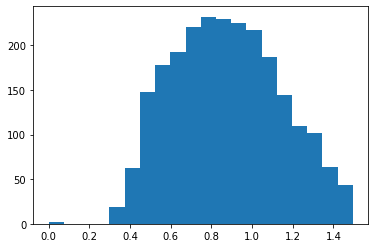

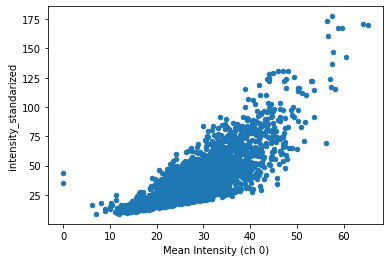

In [215]:
for mouse in ctx_first_mice:
    for region in [1]:#range(1, max_region_no+1):
        compare_sessions(mouse, region, ctx_session_order)